# Análisis de los datos de los coordinómetros de la Presa de Chanlud

## Conversión del archivo de texto
Selección del archivo de texto para clasificarlo por año y convertirlo a formato CSV

In [42]:
lado = 'IZQ'
nivel = 'N2'
eje = 'X'

In [39]:
import pandas as pd

# Rutas a los archivos
ruta_archivo_texto = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/{lado}-{nivel}-{eje}.txt'

# Leer el archivo de texto
df = pd.read_csv(ruta_archivo_texto, sep='\t+', header=None)

# Nombrar las columnas
df.columns = ['Fecha', 'BordeMenor', 'BordeMayor', 'Centro']

# Convertir la columna 'Fecha' al formato deseado
df['Fecha'] = pd.to_datetime(df['Fecha']).dt.strftime('%Y-%m-%dT%H:%M:%S')

# Redondear la columna 'Centro' a 3 decimales
df['Centro'] = df['Centro'].round(3)

# Crear una columna 'Grosor' como la diferencia entre 'BordeMayor' y 'BordeMenor'
df['Grosor'] = df['BordeMayor'] - df['BordeMenor']

# Crear una columna 'Año' para facilitar la agrupación
df['Año'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%dT%H:%M:%S').dt.year

# Agrupar por año y guardar cada grupo en un archivo CSV
for año, grupo in df.groupby('Año'):
    ruta_archivo_csv = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/{lado}-{nivel}-{eje}_{año}.csv'
    # Seleccionar solo las columnas deseadas para guardar
    columnas_a_guardar = ['Fecha', 'BordeMenor', 'BordeMayor', 'Grosor', 'Centro']
    grupo[columnas_a_guardar].to_csv(ruta_archivo_csv, index=True, header=True)


C:\Users\RSA-Milton\AppData\Local\Temp\ipykernel_13448\1023736868.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(ruta_archivo_texto, sep='\t+', header=None)


## Gráfica de archivo clasificado por año
Selecciona el año de uno de los archivos CSV extraidos para graficarlo

In [45]:
año = '2022'

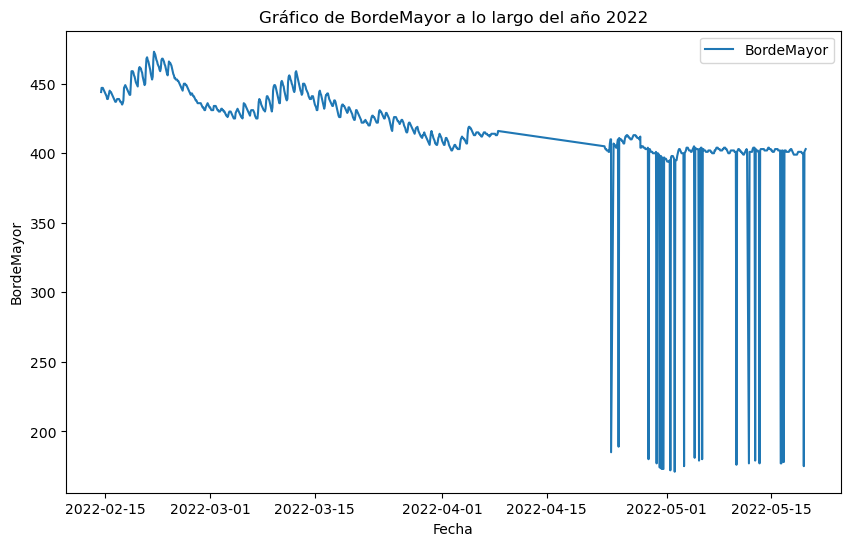

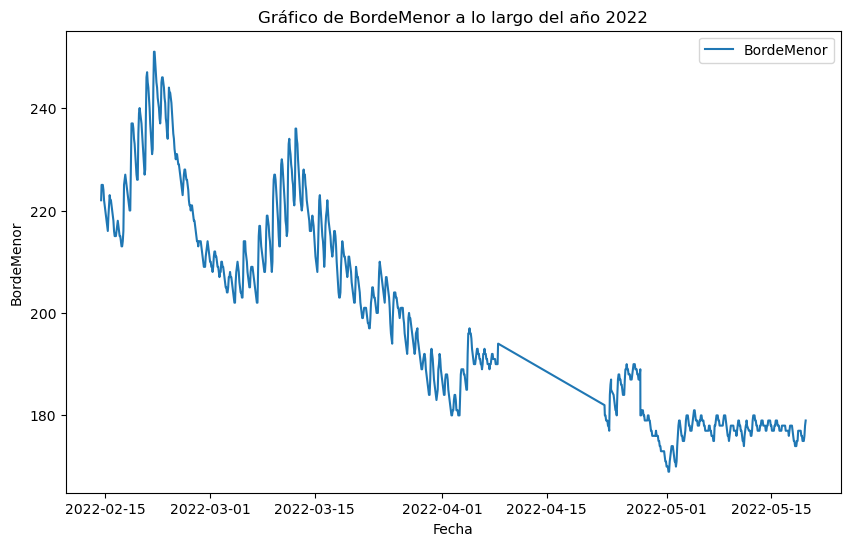

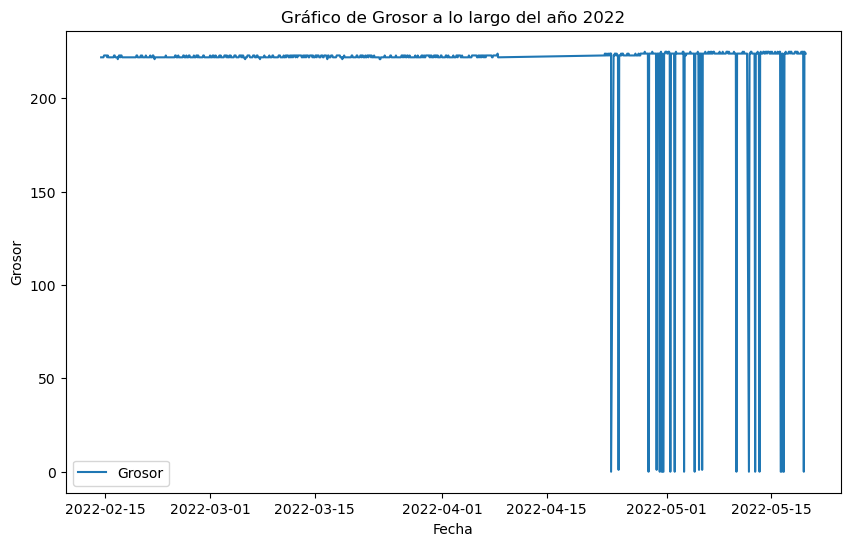

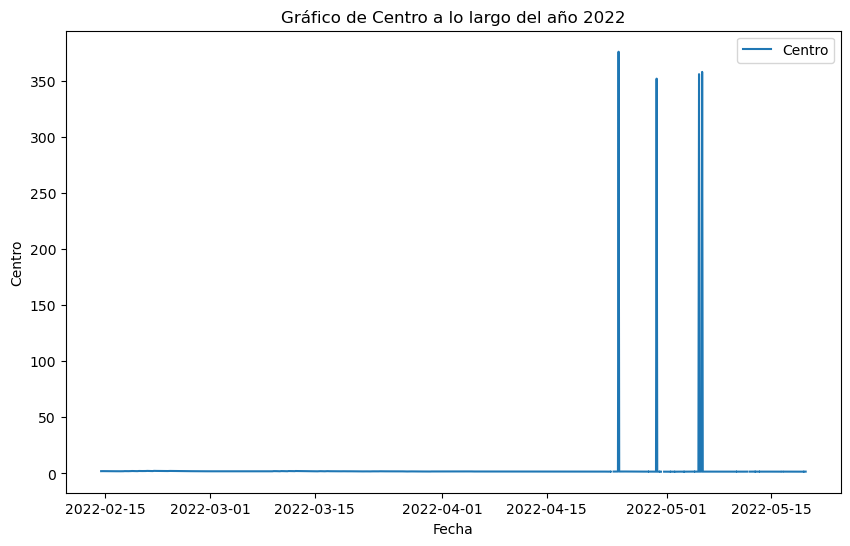

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para graficar los datos
def graficar_datos(ruta_archivo_csv, columna_y):
    # Leer el archivo CSV
    df = pd.read_csv(ruta_archivo_csv)
    
    # Convertir 'Fecha' a formato de fecha y hora
    df['Fecha'] = pd.to_datetime(df['Fecha'])

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df['Fecha'], df[columna_y], label=columna_y)
    plt.xlabel('Fecha')
    plt.ylabel(columna_y)
    plt.title(f'Gráfico de {columna_y} a lo largo del año {año}')
    plt.legend()
    plt.show()

# Ruta al archivo CSV (ajustar según sea necesario)
ruta_archivo_csv = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/{lado}-{nivel}-{eje}_{año}.csv'

# Llamar a la función con la ruta del archivo y la columna a graficar
graficar_datos(ruta_archivo_csv, 'BordeMayor')  
graficar_datos(ruta_archivo_csv, 'BordeMenor')  
graficar_datos(ruta_archivo_csv, 'Grosor')  
graficar_datos(ruta_archivo_csv, 'Centro') 


# Corrección de bordes

Selecciona el borde que se debe corregir.
Procesa un borde a la vez para evitar errores.

In [28]:
import pandas as pd

# Ruta al archivo CSV 
ruta_archivo_csv = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/{lado}-{nivel}-{eje}_{año}.csv'
ruta_archivo_csv_corregido = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/Corregido/{lado}-{nivel}-{eje}_{año}.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_archivo_csv)

# Parámetros para la corrección
columna_a_corregir = 'BordeMayor'  
limiteInferior = 0  
limiteSuperior = 350 
factorCorreccion = 224

# Aplicar corrección
df.loc[(df[columna_a_corregir] > limiteInferior) & (df[columna_a_corregir] < limiteSuperior), columna_a_corregir] += factorCorreccion

# Guardar los cambios en el archivo CSV
df.to_csv(ruta_archivo_csv_corregido, index=False)


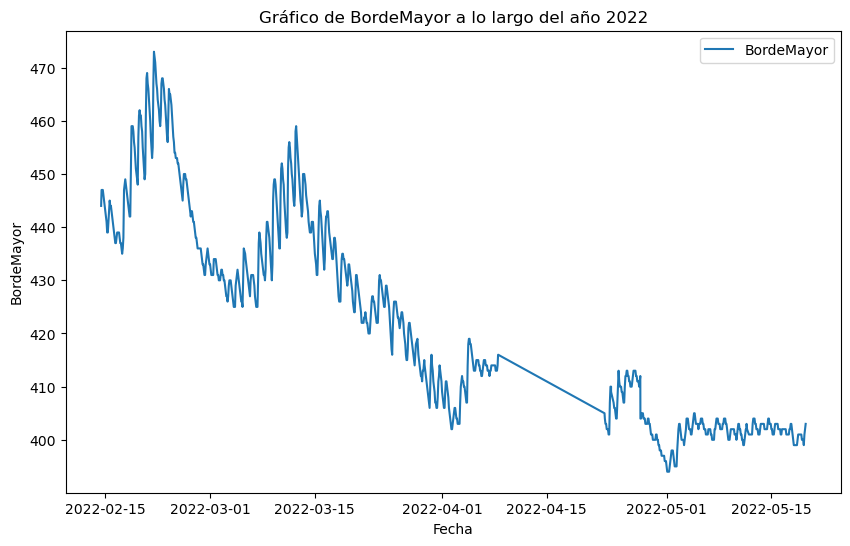

In [30]:
# Llamar a la función con la ruta del archivo y la columna a graficar
graficar_datos(ruta_archivo_csv_corregido, 'BordeMayor') 

### Recalcular grosor y centro

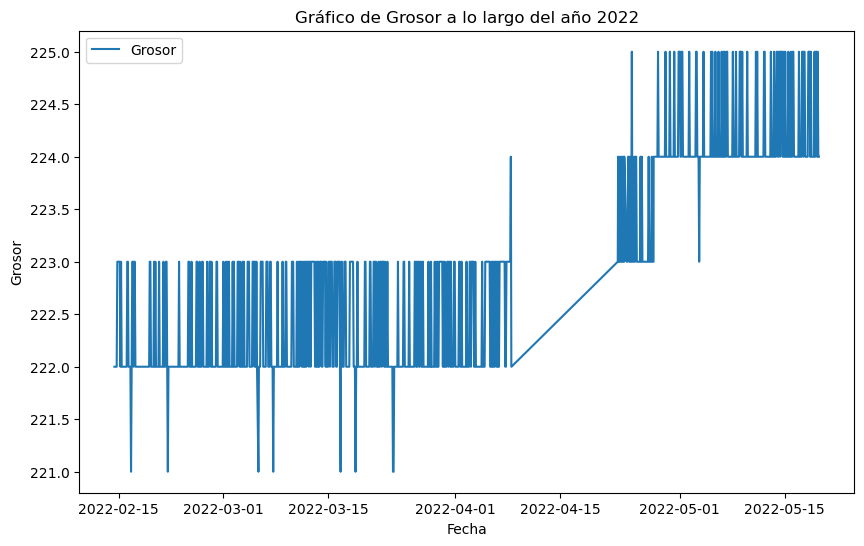

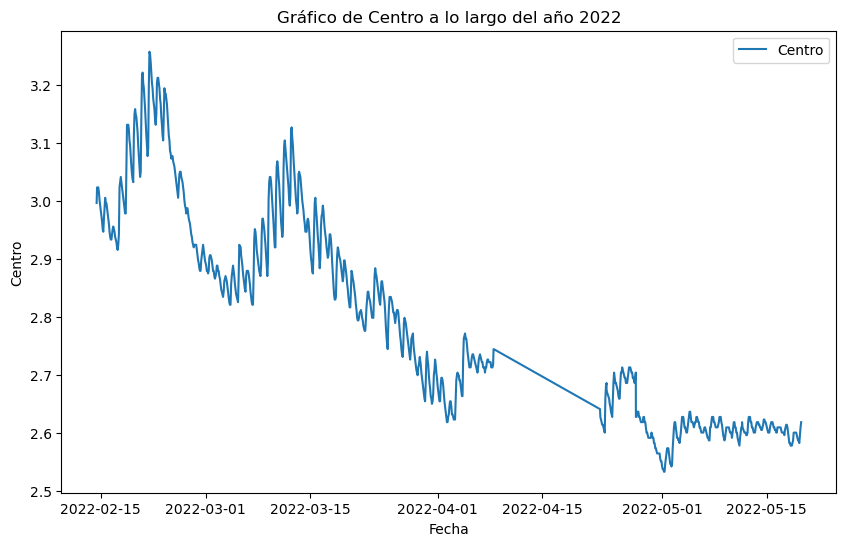

In [37]:
import pandas as pd

# Ruta al archivo CSV 
ruta_archivo_csv_corregido = f'C:/Users/RSA-Milton/Desktop/Coordinometros/Fotos/{lado}/{lado}-{nivel}-{eje}/Corregido/{lado}-{nivel}-{eje}_{año}.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta_archivo_csv_corregido)

# Recalcular Grosor
df['Grosor'] = df['BordeMayor'] - df['BordeMenor']

# Recalcular Centro
df['Centro'] = (df['BordeMayor']-(df['Grosor']/2)) * (2/df['Grosor']).round(3)

# Guardar los cambios en el archivo CSV
df.to_csv(ruta_archivo_csv_corregido, index=False)

graficar_datos(ruta_archivo_csv_corregido, 'Grosor') 
graficar_datos(ruta_archivo_csv_corregido, 'Centro') 